# Covid-19 Analysis
In this project, I will walk you through the task of Global Pandemic COVID 19 Analysis with Python. COVID-19 does not need to be introduced, it is the latest infectious disease to take hold of the whole world. So, have you wondered how the world has changed in recent months? Let’s visualize this change over the months in different countries spread by the COVID 19 pandemic.

In this project, I will use the Choropleth maps, for the task of COVID 19 analysis with Python, as by using Choropleth maps we can analyze the spread across different countries with much less code.

# About Covid-19
Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus.

Most people infected with the virus will experience mild to moderate respiratory illness and recover without requiring special treatment. However, some will become seriously ill and require medical attention. Older people and those with underlying medical conditions like cardiovascular disease, diabetes, chronic respiratory disease, or cancer are more likely to develop serious illness. Anyone can get sick with COVID-19 and become seriously ill or die at any age. 

The best way to prevent and slow down transmission is to be well informed about the disease and how the virus spreads. Protect yourself and others from infection by staying at least 1 metre apart from others, wearing a properly fitted mask, and washing your hands or using an alcohol-based rub frequently. Get vaccinated when it’s your turn and follow local guidance.

The virus can spread from an infected person’s mouth or nose in small liquid particles when they cough, sneeze, speak, sing or breathe. These particles range from larger respiratory droplets to smaller aerosols. It is important to practice respiratory etiquette, for example by coughing into a flexed elbow, and to stay home and self-isolate until you recover if you feel unwell.


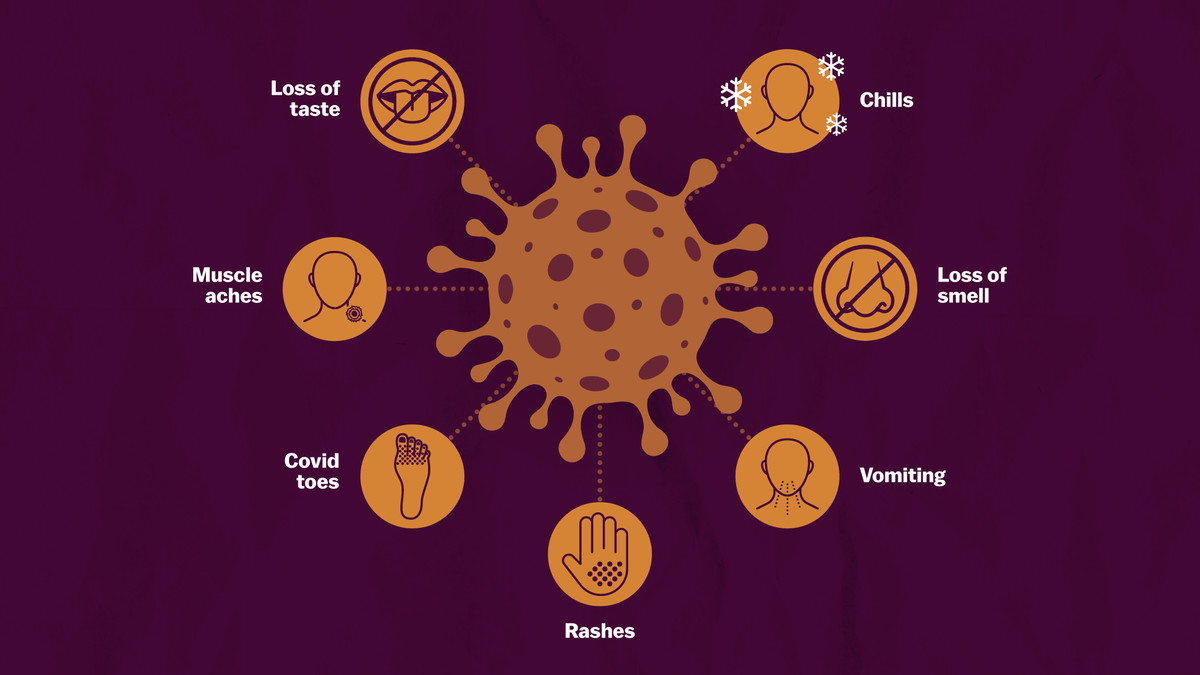

# What are Choropleth Maps?

The Choropleth maps split the different geographical regions based on statistical data or any other data variable. It is a type of thematic map where different regions are shaded according to the variable considered and the proportion of representation of the variable for a region.

For example, consider the image below which shows the GDP per capita in different countries. The map uses a colour gradation of GDP per capita to denote the different countries on the map below.


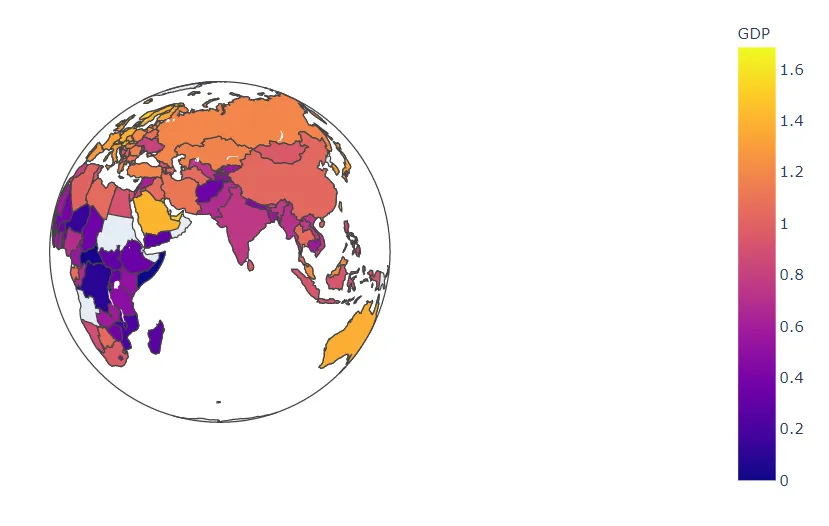

# COVID 19 Analysis with Python using Folium
Folium is a library in Python that can be used to visualize geospatial data. Leaflet.js is a JavaScript library for creating maps and Folium combines the features of Leaflet with the data management capabilities of python to create beautiful interactive maps.

Folium helps link data to create maps like choropleth and also activates marker functionality with HTML visualizations. Different map projections are also available like orthographic, natural earth, etc. and different map tiles like MapBox, StamenToner, among others.

Now consider the global COVID 19 dataset to create a choropleth map, you can download the dataset that I am using in this task from here.

# COVID 19 Analysis with Python
Now let’s start with the task of COVID 19 analysis with Python. First, we need to generate a base map. The following code can be used for this:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins
plt.rcParams['figure.figsize'] = 10, 12
import warnings
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_India= pd.read_csv('covid_19_India.csv')
India_coord = pd.read_excel('Indian Coordinates.xlsx')

In [3]:
print(df_India.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB
None


In [4]:
df_India.head()

Sno        Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  2020-01-30  6:00 PM               Kerala                       1   
1    2  2020-01-31  6:00 PM               Kerala                       1   
2    3  2020-02-01  6:00 PM               Kerala                       2   
3    4  2020-02-02  6:00 PM               Kerala                       3   
4    5  2020-02-03  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3

In [5]:

df_India.tail()

Sno        Date     Time State/UnionTerritory  \
18105  18106  2021-08-11  8:00 AM            Telangana   
18106  18107  2021-08-11  8:00 AM              Tripura   
18107  18108  2021-08-11  8:00 AM          Uttarakhand   
18108  18109  2021-08-11  8:00 AM        Uttar Pradesh   
18109  18110  2021-08-11  8:00 AM          West Bengal   

      ConfirmedIndianNational ConfirmedForeignNational    Cured  Deaths  \
18105                       -                        -   638410    3831   
18106                       -                        -    77811     773   
18107                       -                        -   334650    7368   
18108                       -                        -  1685492   22775   
18109                       -                        -  1506532   18252   

       Confirmed  
18105     650353  
18106      80660  
18107     342462  
18108    1708812  
18109    1534999

In [6]:
df_India.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [7]:
print(India_coord.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name of State / UT  35 non-null     object 
 1   Latitude            35 non-null     float64
 2   Longitude           35 non-null     float64
dtypes: float64(2), object(1)
memory usage: 968.0+ bytes
None


In [8]:
India_coord.head()

Name of State / UT   Latitude  Longitude
0  Andaman And Nicobar   11.667026  92.735983
1        Andhra Pradesh  14.750429  78.570026
2    Arunachal Pradesh   27.100399  93.616601
3                Assam   26.749981  94.216667
4                Bihar   25.785414  87.479973

In [9]:
India_coord.head()

Name of State / UT   Latitude  Longitude
0  Andaman And Nicobar   11.667026  92.735983
1        Andhra Pradesh  14.750429  78.570026
2    Arunachal Pradesh   27.100399  93.616601
3                Assam   26.749981  94.216667
4                Bihar   25.785414  87.479973

In [10]:
def replace_dash_with_zeros(inp):
    return int(inp.replace("-","0"))

# df_India.drop(['Sno'],axis=1,inplace=True)
df_India['Date'] = pd.to_datetime(df_India['Date'], format = "%Y-%m-%d")
df_India['ConfirmedIndianNational'] = df_India['ConfirmedIndianNational'].apply(replace_dash_with_zeros)
df_India['ConfirmedForeignNational'] = df_India['ConfirmedForeignNational'].apply(replace_dash_with_zeros)
df_India.sort_values("Confirmed", ascending = False, inplace = True)
df_India


Sno       Date     Time State/UnionTerritory  \
18094  18095 2021-08-11  8:00 AM          Maharashtra   
18058  18059 2021-08-10  8:00 AM          Maharashtra   
18022  18023 2021-08-09  8:00 AM          Maharashtra   
17986  17987 2021-08-08  8:00 AM          Maharashtra   
17950  17951 2021-08-07  8:00 AM          Maharashtra   
...      ...        ...      ...                  ...   
1146    1147 2020-04-20  5:00 PM             Nagaland   
10207  10208 2021-01-04  8:00 AM          Lakshadweep   
1113    1114 2020-04-19  5:00 PM             Nagaland   
9523    9524 2020-12-16  8:00 AM          Lakshadweep   
10099  10100 2021-01-01  8:00 AM          Lakshadweep   

       ConfirmedIndianNational  ConfirmedForeignNational    Cured  Deaths  \
18094                        0                         0  6159676  134201   
18058                        0                         0  6151956  134064   
18022                        0                         0  6144388  133996   
17986                        0                         0  6139493  133845   
17950                        0                         0  6130137  133717   
...                        ...                       ...      ...     ...   
1146                         0                         0        0       0   
10207                        0                         0        0       0   
1113                         0                         0        0       0   
9523                         0                         0        0       0   
10099                        0                         0        0       0   

       Confirmed  
18094    6363442  
18058    6357833  
18022    6353328  
17986    6347820  
17950    6341759  
...          ...  
1146           0  
10207          0  
1113           0  
9523           0  
10099          0  

[18110 rows x 9 columns]

In [11]:
df_India.loc[df_India["ConfirmedForeignNational"] == "-",:]

Empty DataFrame
Columns: [Sno, Date, Time, State/UnionTerritory, ConfirmedIndianNational, ConfirmedForeignNational, Cured, Deaths, Confirmed]
Index: []

In [12]:
list(zip(df_India.columns,df_India.dtypes,df_India.isna().sum()))

[('Sno', dtype('int64'), 0),
 ('Date', dtype('<M8[ns]'), 0),
 ('Time', dtype('O'), 0),
 ('State/UnionTerritory', dtype('O'), 0),
 ('ConfirmedIndianNational', dtype('int64'), 0),
 ('ConfirmedForeignNational', dtype('int64'), 0),
 ('Cured', dtype('int64'), 0),
 ('Deaths', dtype('int64'), 0),
 ('Confirmed', dtype('int64'), 0)]

In [13]:
print(f'We have data available from : {df_India.Date.min()} to {df_India.Date.max()}')

We have data available from : 2020-01-30 00:00:00 to 2021-08-11 00:00:00


In [14]:
df_India.groupby(["State/UnionTerritory", "Date"]).sum()

Sno  ConfirmedIndianNational  \
State/UnionTerritory        Date                                         
Andaman and Nicobar Islands 2020-03-26    366                        1   
                            2020-03-27    393                        1   
                            2020-03-28    421                        6   
                            2020-03-29    448                        0   
                            2020-03-30    475                        0   
...                                       ...                      ...   
West Bengal                 2021-08-07  17966                        0   
                            2021-08-08  18002                        0   
                            2021-08-09  18038                        0   
                            2021-08-10  18074                        0   
                            2021-08-11  18110                        0   

                                        ConfirmedForeignNational    Cured  \
State/UnionTerritory        Date                                            
Andaman and Nicobar Islands 2020-03-26                         0        0   
                            2020-03-27                         0        0   
                            2020-03-28                         0        0   
                            2020-03-29                         0        0   
                            2020-03-30                         0        0   
...                                                          ...      ...   
West Bengal                 2021-08-07                         0  1503535   
                            2021-08-08                         0  1504326   
                            2021-08-09                         0  1505089   
                            2021-08-10                         0  1505808   
                            2021-08-11                         0  1506532   

                                        Deaths  Confirmed  
State/UnionTerritory        Date                           
Andaman and Nicobar Islands 2020-03-26       0          1  
                            2020-03-27       0          1  
                            2020-03-28       0          6  
                            2020-03-29       0          9  
                            2020-03-30       0          9  
...                                        ...        ...  
West Bengal                 2021-08-07   18202    1532379  
                            2021-08-08   18217    1533128  
                            2021-08-09   18229    1533803  
                            2021-08-10   18240    1534360  
                            2021-08-11   18252    1534999  

[18110 rows x 6 columns]

In [15]:
States = df_India['State/UnionTerritory'].unique().tolist()
States

['Maharashtra',
 'Maharashtra***',
 'Kerala',
 'Karnataka',
 'Karanataka',
 'Tamil Nadu',
 'Andhra Pradesh',
 'Uttar Pradesh',
 'West Bengal',
 'Delhi',
 'Chhattisgarh',
 'Odisha',
 'Rajasthan',
 'Gujarat',
 'Madhya Pradesh',
 'Madhya Pradesh***',
 'Haryana',
 'Bihar',
 'Bihar****',
 'Telangana',
 'Punjab',
 'Assam',
 'Telengana',
 'Jharkhand',
 'Uttarakhand',
 'Jammu and Kashmir',
 'Himachal Pradesh',
 'Himanchal Pradesh',
 'Goa',
 'Puducherry',
 'Manipur',
 'Tripura',
 'Meghalaya',
 'Chandigarh',
 'Arunachal Pradesh',
 'Mizoram',
 'Nagaland',
 'Sikkim',
 'Ladakh',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Dadra and Nagar Haveli',
 'Lakshadweep',
 'Cases being reassigned to states',
 'Andaman and Nicobar Islands',
 'Unassigned',
 'Daman & Diu']

In [16]:
# States.remove("Cases being reassigned to states")
States.remove("Unassigned")
States

['Maharashtra',
 'Maharashtra***',
 'Kerala',
 'Karnataka',
 'Karanataka',
 'Tamil Nadu',
 'Andhra Pradesh',
 'Uttar Pradesh',
 'West Bengal',
 'Delhi',
 'Chhattisgarh',
 'Odisha',
 'Rajasthan',
 'Gujarat',
 'Madhya Pradesh',
 'Madhya Pradesh***',
 'Haryana',
 'Bihar',
 'Bihar****',
 'Telangana',
 'Punjab',
 'Assam',
 'Telengana',
 'Jharkhand',
 'Uttarakhand',
 'Jammu and Kashmir',
 'Himachal Pradesh',
 'Himanchal Pradesh',
 'Goa',
 'Puducherry',
 'Manipur',
 'Tripura',
 'Meghalaya',
 'Chandigarh',
 'Arunachal Pradesh',
 'Mizoram',
 'Nagaland',
 'Sikkim',
 'Ladakh',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Dadra and Nagar Haveli',
 'Lakshadweep',
 'Cases being reassigned to states',
 'Andaman and Nicobar Islands',
 'Daman & Diu']

In [17]:
len(States)


45

# Merging DataFrame


In [18]:
df_final_India = pd.DataFrame()
dates = pd.DataFrame({"Date": pd.date_range(df_India.Date.min(),df_India.Date.max())})
for state in States:
    all_dates_df = pd.merge(dates, 
                            df_India.loc[df_India['State/UnionTerritory'] == state,:], on = "Date",
                           how = "left")
    all_dates_df['State/UnionTerritory'] = state
    all_dates_df = all_dates_df.fillna(0)
    all_dates_df['New Cases'] = all_dates_df['Confirmed'] - all_dates_df['Confirmed'].shift(1)
#     print(state)
#     display(all_dates_df.loc[all_dates_df['New Cases'] <  0,:])
    df_final_India = pd.concat([df_final_India, all_dates_df],axis = 0)
print("Finally we have a data of Size: ",df_final_India.shape)
df_final_India.head()

Finally we have a data of Size:  (25200, 10)


Date  Sno Time State/UnionTerritory  ConfirmedIndianNational  \
0 2020-01-30  0.0    0          Maharashtra                      0.0   
1 2020-01-31  0.0    0          Maharashtra                      0.0   
2 2020-02-01  0.0    0          Maharashtra                      0.0   
3 2020-02-02  0.0    0          Maharashtra                      0.0   
4 2020-02-03  0.0    0          Maharashtra                      0.0   

   ConfirmedForeignNational  Cured  Deaths  Confirmed  New Cases  
0                       0.0    0.0     0.0        0.0        NaN  
1                       0.0    0.0     0.0        0.0        0.0  
2                       0.0    0.0     0.0        0.0        0.0  
3                       0.0    0.0     0.0        0.0        0.0  
4                       0.0    0.0     0.0        0.0        0.0

In [19]:
df_final_India.dropna(inplace = True)
df_final_India.shape

(25155, 10)

In [20]:
del df_final_India['Time']
del df_final_India['ConfirmedIndianNational']
del df_final_India['ConfirmedForeignNational']

In [21]:
df_final_India

Date  Sno State/UnionTerritory  Cured  Deaths  Confirmed  New Cases
1   2020-01-31  0.0          Maharashtra    0.0     0.0        0.0        0.0
2   2020-02-01  0.0          Maharashtra    0.0     0.0        0.0        0.0
3   2020-02-02  0.0          Maharashtra    0.0     0.0        0.0        0.0
4   2020-02-03  0.0          Maharashtra    0.0     0.0        0.0        0.0
5   2020-02-04  0.0          Maharashtra    0.0     0.0        0.0        0.0
..         ...  ...                  ...    ...     ...        ...        ...
555 2021-08-07  0.0          Daman & Diu    0.0     0.0        0.0        0.0
556 2021-08-08  0.0          Daman & Diu    0.0     0.0        0.0        0.0
557 2021-08-09  0.0          Daman & Diu    0.0     0.0        0.0        0.0
558 2021-08-10  0.0          Daman & Diu    0.0     0.0        0.0        0.0
559 2021-08-11  0.0          Daman & Diu    0.0     0.0        0.0        0.0

[25155 rows x 7 columns]

In [22]:
df_final_India.groupby(["State/UnionTerritory", "Date"]).sum()

Sno      Cured   Deaths  \
State/UnionTerritory        Date                                      
Andaman and Nicobar Islands 2020-01-31      0.0        0.0      0.0   
                            2020-02-01      0.0        0.0      0.0   
                            2020-02-02      0.0        0.0      0.0   
                            2020-02-03      0.0        0.0      0.0   
                            2020-02-04      0.0        0.0      0.0   
...                                         ...        ...      ...   
West Bengal                 2021-08-07  17966.0  1503535.0  18202.0   
                            2021-08-08  18002.0  1504326.0  18217.0   
                            2021-08-09  18038.0  1505089.0  18229.0   
                            2021-08-10  18074.0  1505808.0  18240.0   
                            2021-08-11  18110.0  1506532.0  18252.0   

                                        Confirmed  New Cases  
State/UnionTerritory        Date                              
Andaman and Nicobar Islands 2020-01-31        0.0        0.0  
                            2020-02-01        0.0        0.0  
                            2020-02-02        0.0        0.0  
                            2020-02-03        0.0        0.0  
                            2020-02-04        0.0        0.0  
...                                           ...        ...  
West Bengal                 2021-08-07  1532379.0      717.0  
                            2021-08-08  1533128.0      749.0  
                            2021-08-09  1533803.0      675.0  
                            2021-08-10  1534360.0      557.0  
                            2021-08-11  1534999.0      639.0  

[25155 rows x 5 columns]

In [23]:
df_final_India = df_final_India.groupby(["State/UnionTerritory", "Date"]).sum().reset_index()
df_final_India

State/UnionTerritory       Date      Sno      Cured   Deaths  \
0      Andaman and Nicobar Islands 2020-01-31      0.0        0.0      0.0   
1      Andaman and Nicobar Islands 2020-02-01      0.0        0.0      0.0   
2      Andaman and Nicobar Islands 2020-02-02      0.0        0.0      0.0   
3      Andaman and Nicobar Islands 2020-02-03      0.0        0.0      0.0   
4      Andaman and Nicobar Islands 2020-02-04      0.0        0.0      0.0   
...                            ...        ...      ...        ...      ...   
25150                  West Bengal 2021-08-07  17966.0  1503535.0  18202.0   
25151                  West Bengal 2021-08-08  18002.0  1504326.0  18217.0   
25152                  West Bengal 2021-08-09  18038.0  1505089.0  18229.0   
25153                  West Bengal 2021-08-10  18074.0  1505808.0  18240.0   
25154                  West Bengal 2021-08-11  18110.0  1506532.0  18252.0   

       Confirmed  New Cases  
0            0.0        0.0  
1            0.0        0.0  
2            0.0        0.0  
3            0.0        0.0  
4            0.0        0.0  
...          ...        ...  
25150  1532379.0      717.0  
25151  1533128.0      749.0  
25152  1533803.0      675.0  
25153  1534360.0      557.0  
25154  1534999.0      639.0  

[25155 rows x 7 columns]

# StateWise Covid-19 Status in India

In [24]:
def plot_pie(active,cured,death,title):
    labels = ['Active','Recovered','Died']
    sizes = [active,cured,death]
    color= ['#66b3ff','green','red']
    explode = []

    for i in labels:
        explode.append(0.05)
    
    plt.figure(figsize= (15,6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode,colors = color)
    centre_circle = plt.Circle((0,0),0.70,fc='white')

    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(title +  'COVID-19 Cases',fontsize = 20)
    plt.axis('equal')  

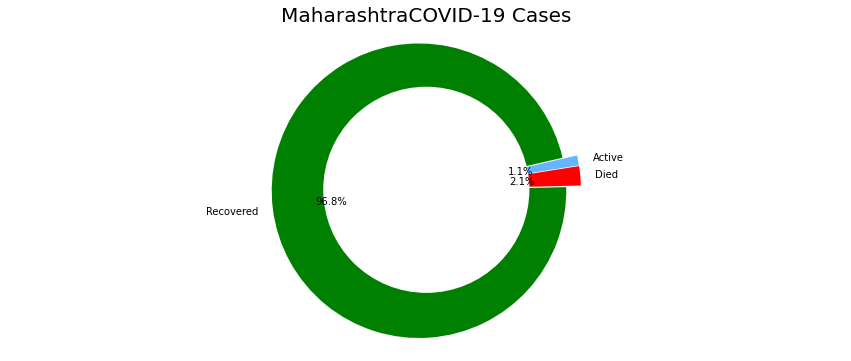

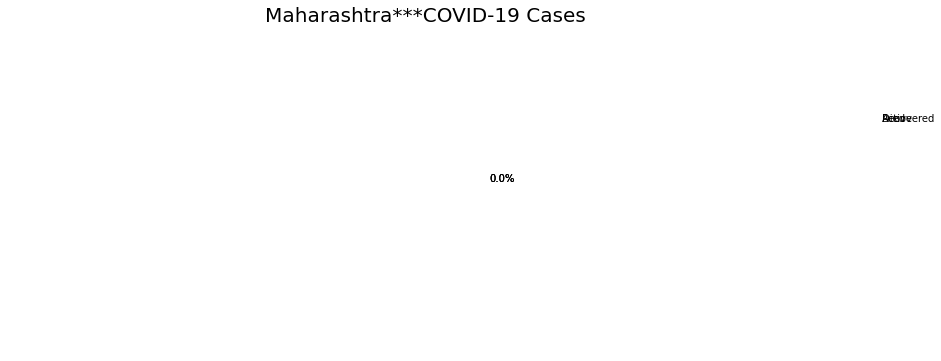

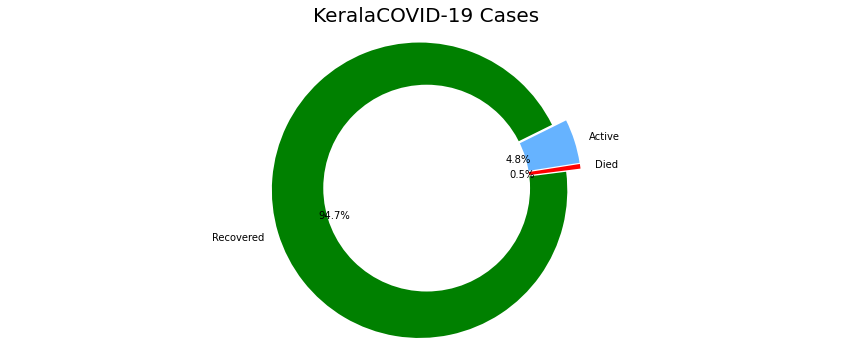

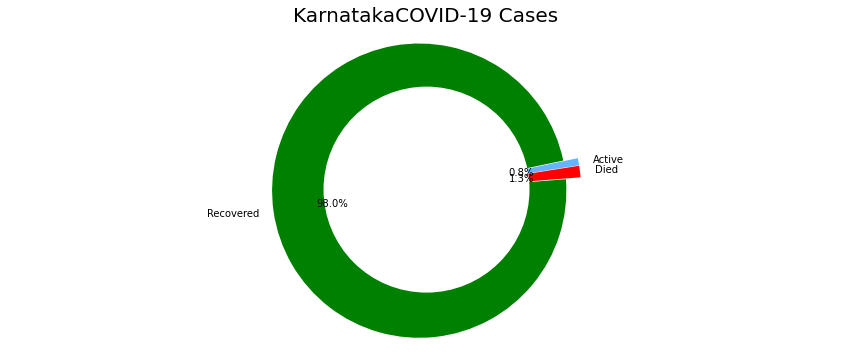

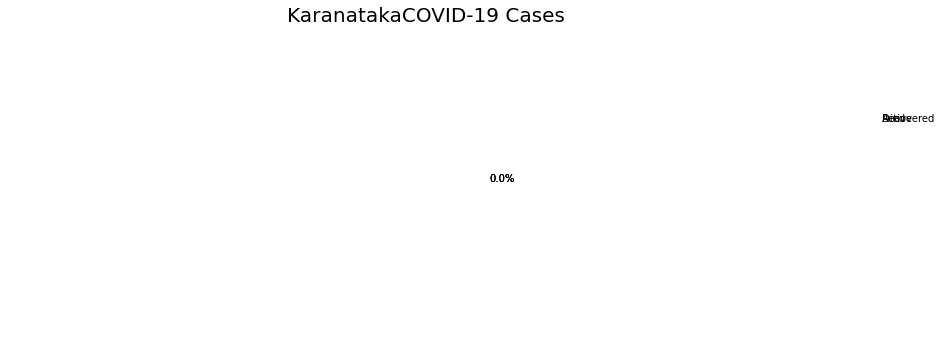

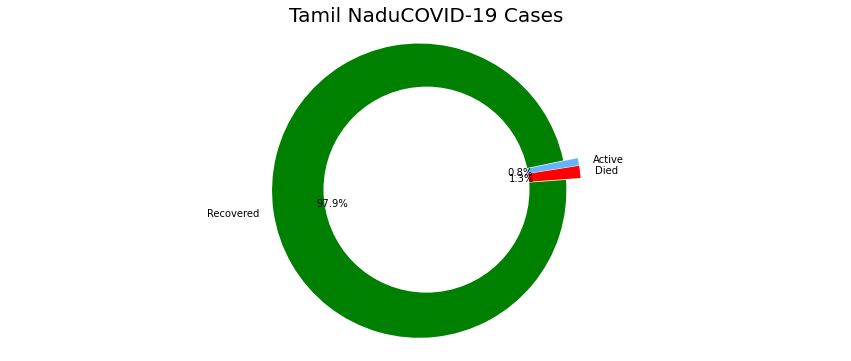

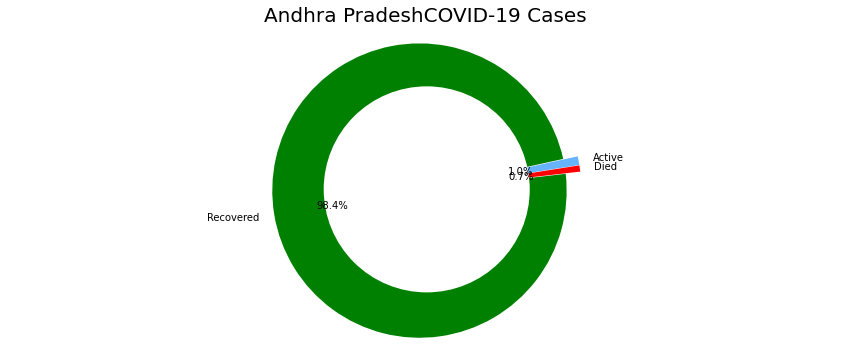

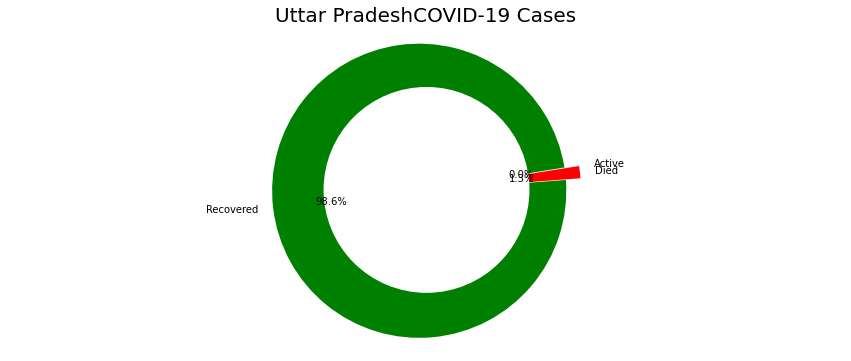

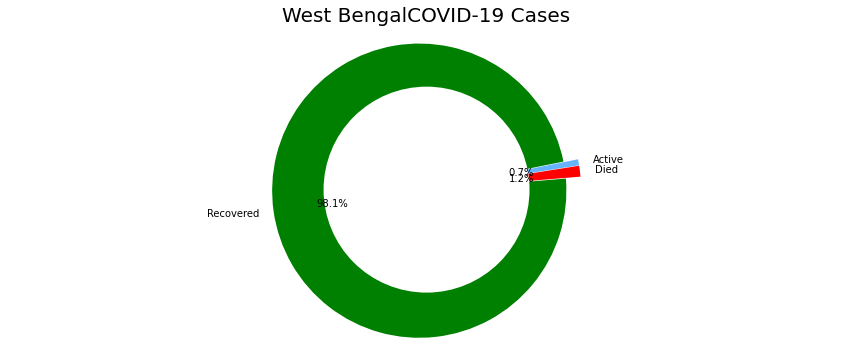

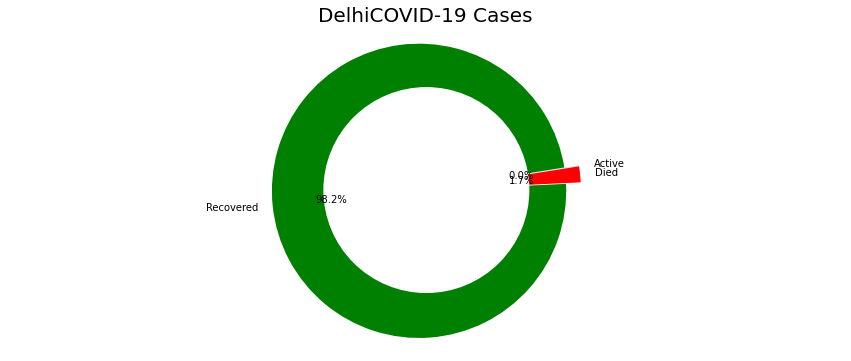

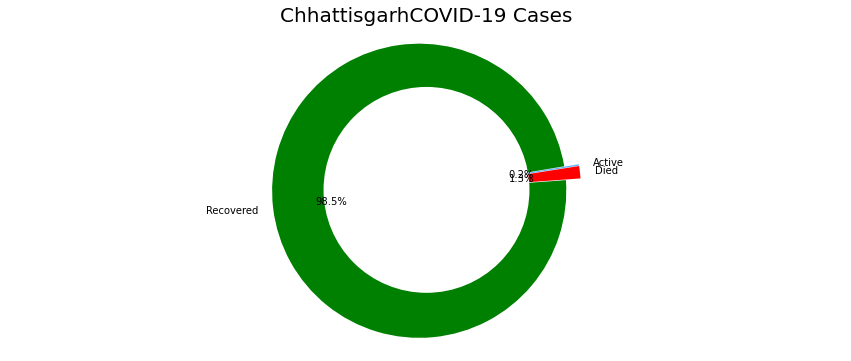

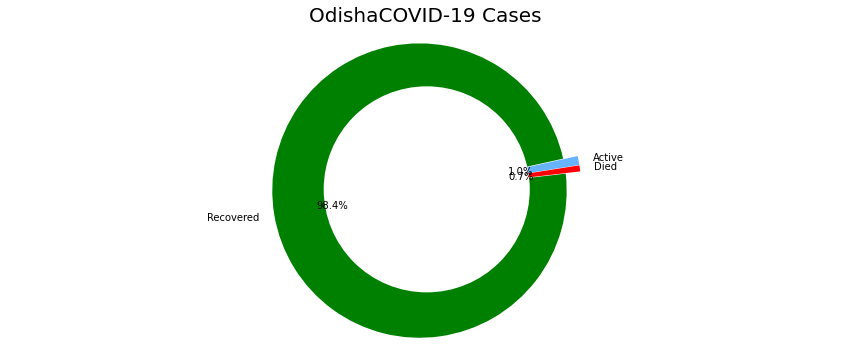

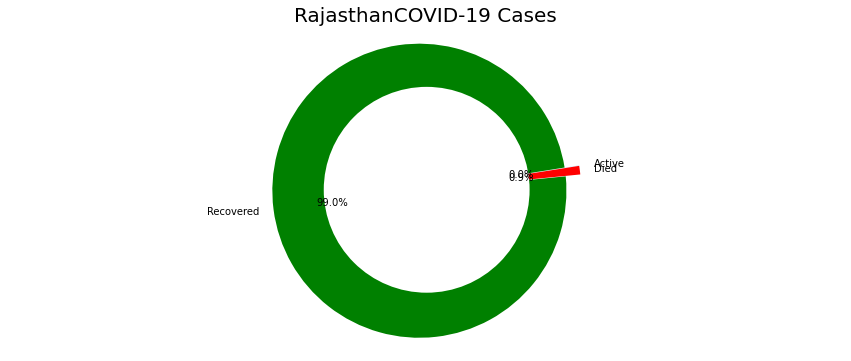

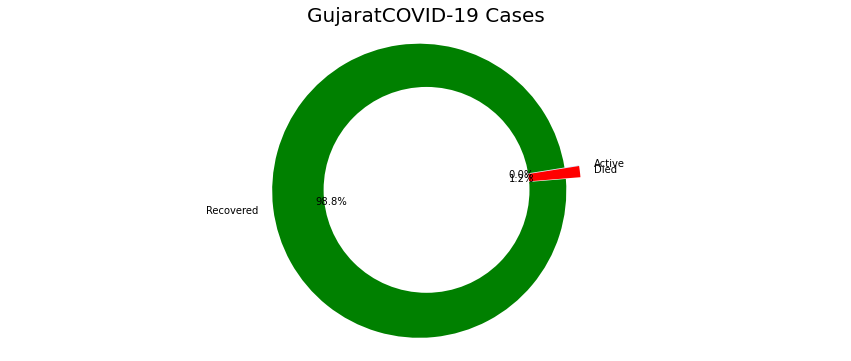

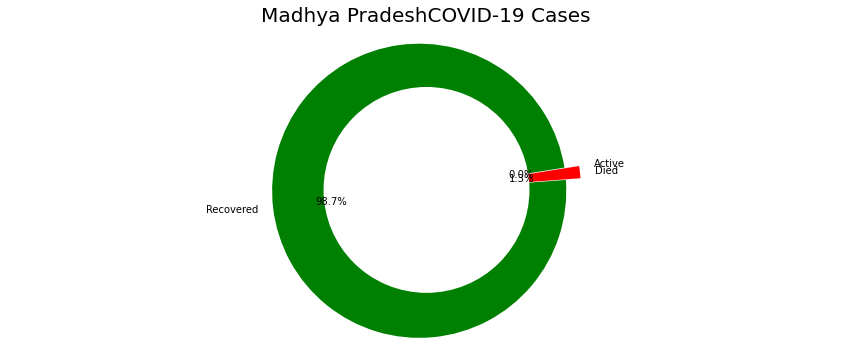

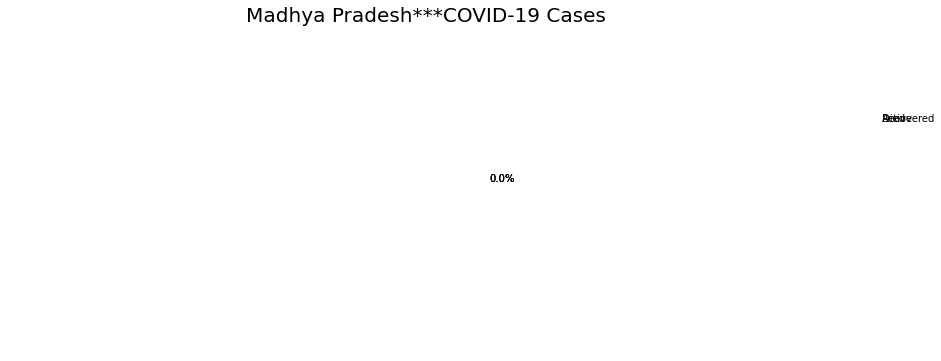

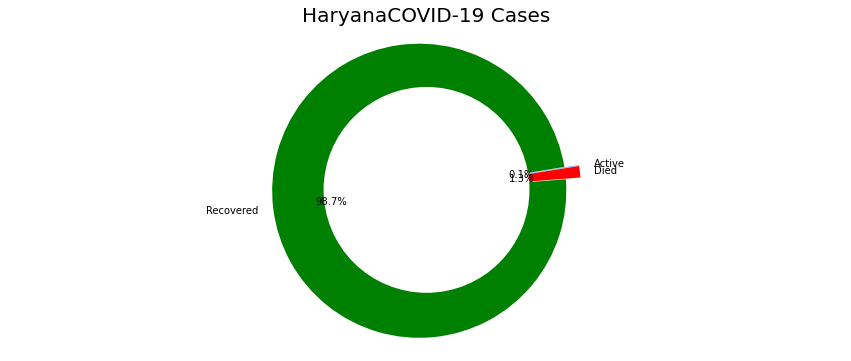

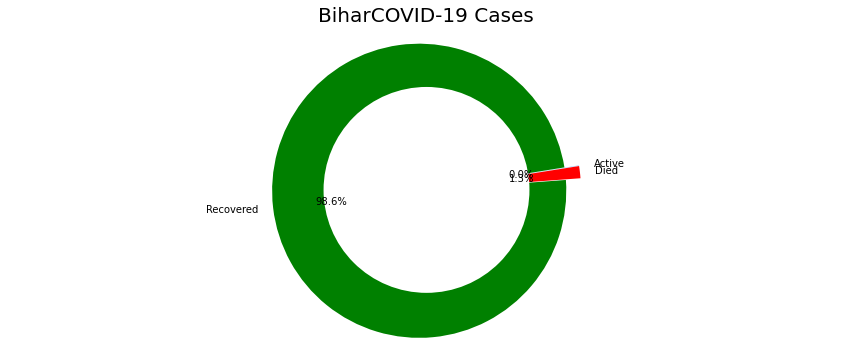

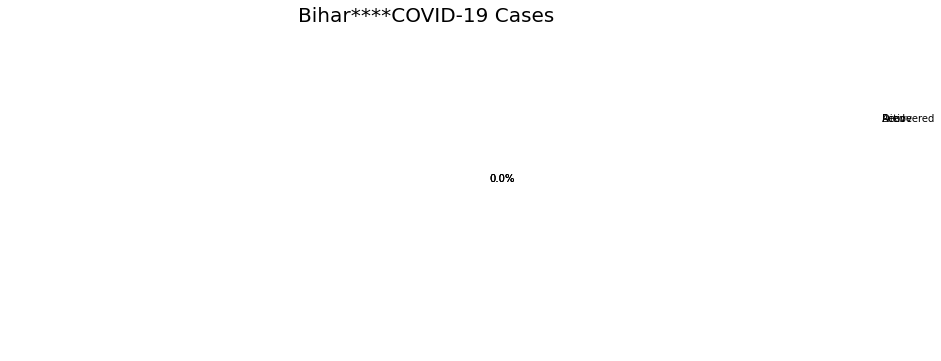

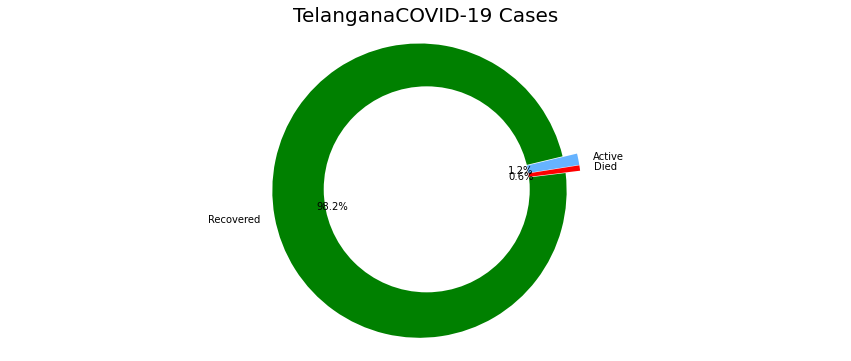

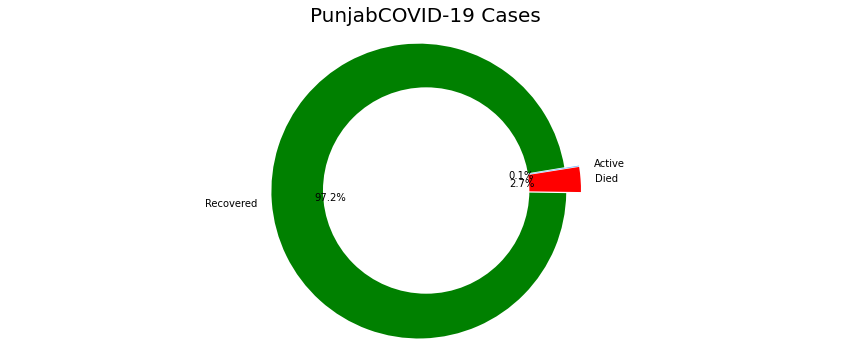

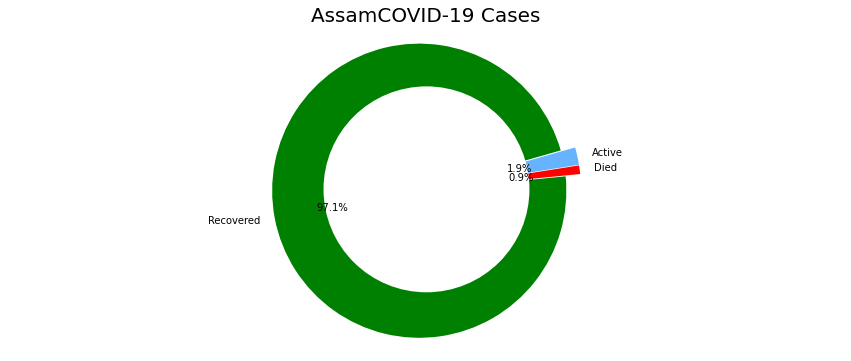

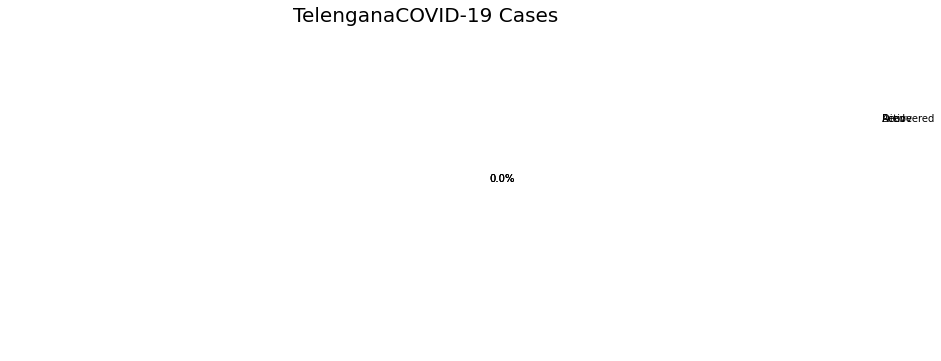

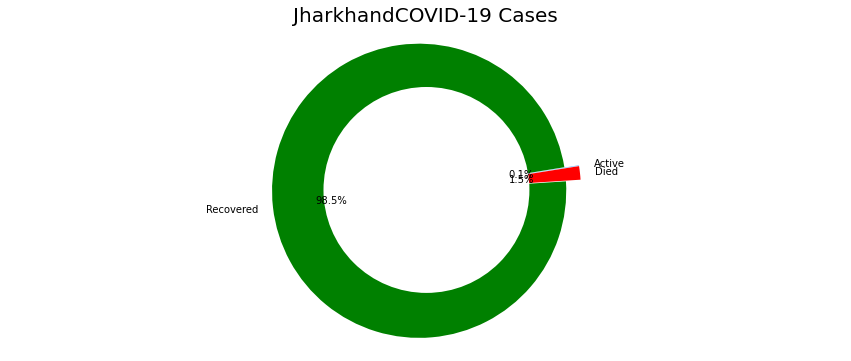

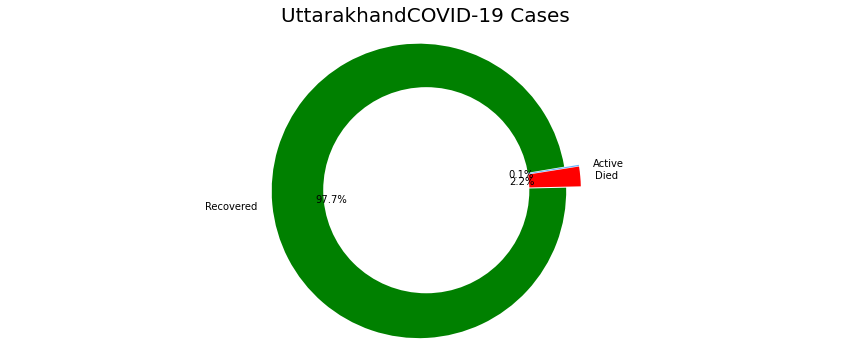

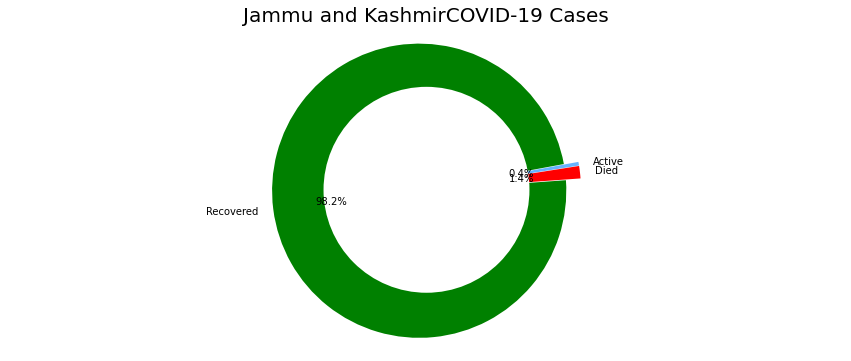

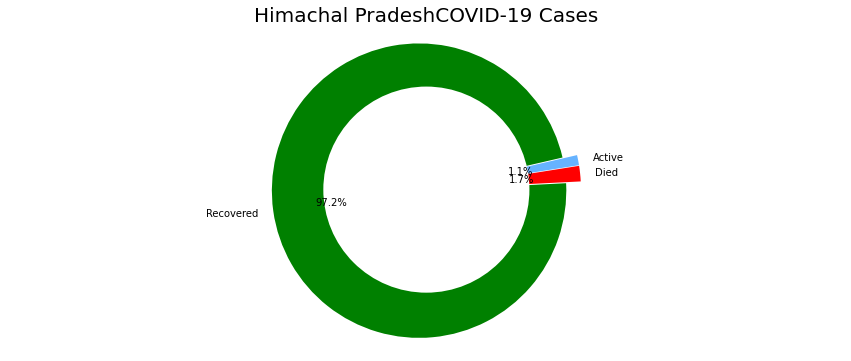

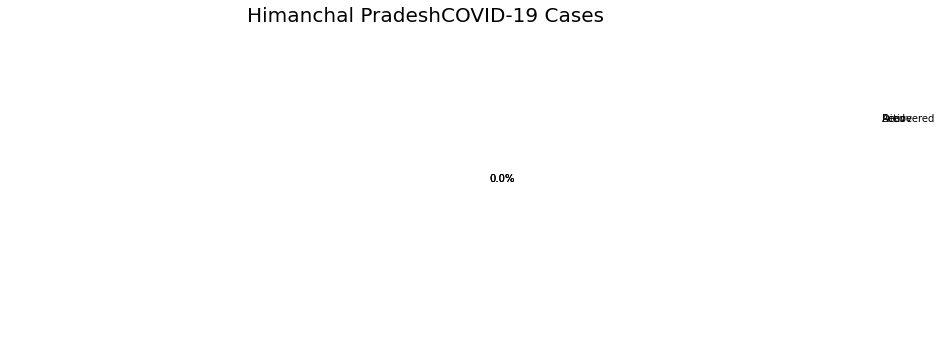

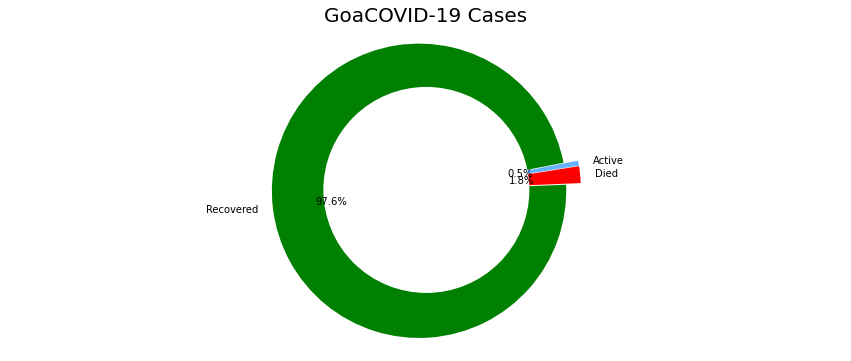

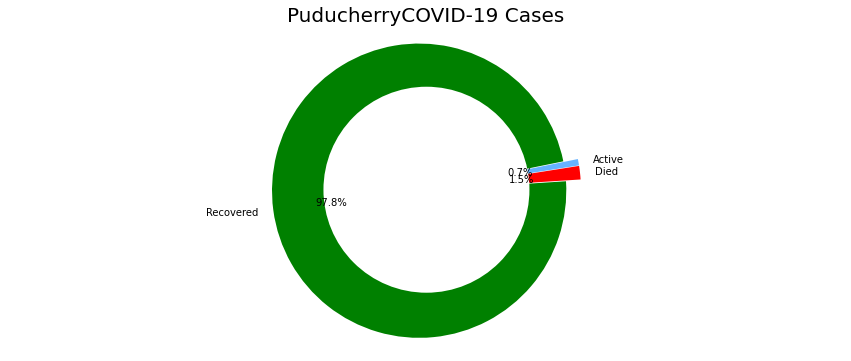

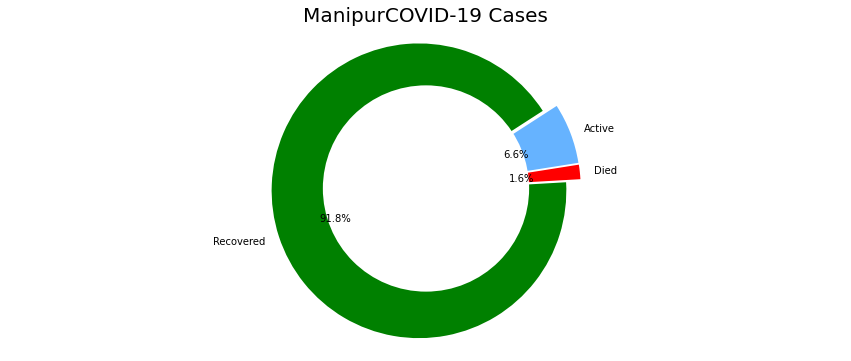

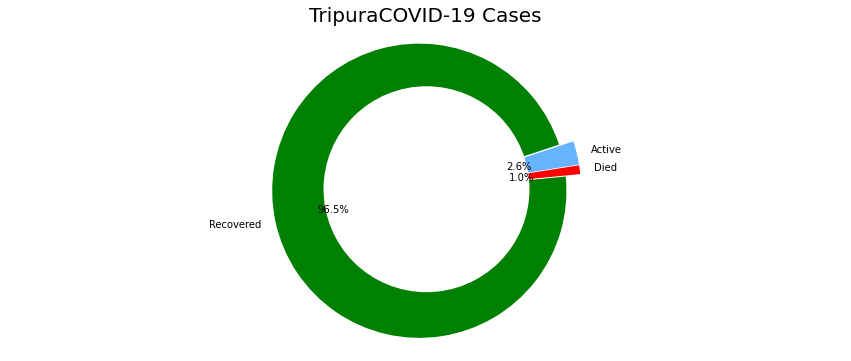

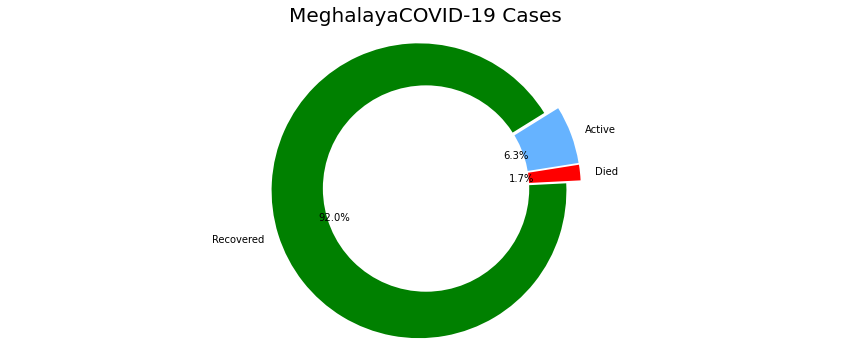

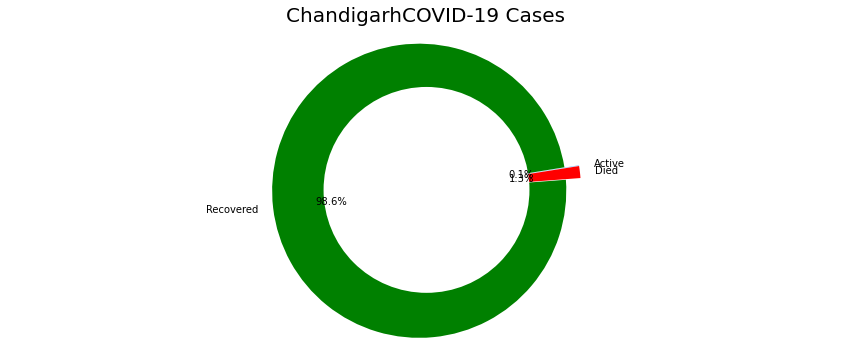

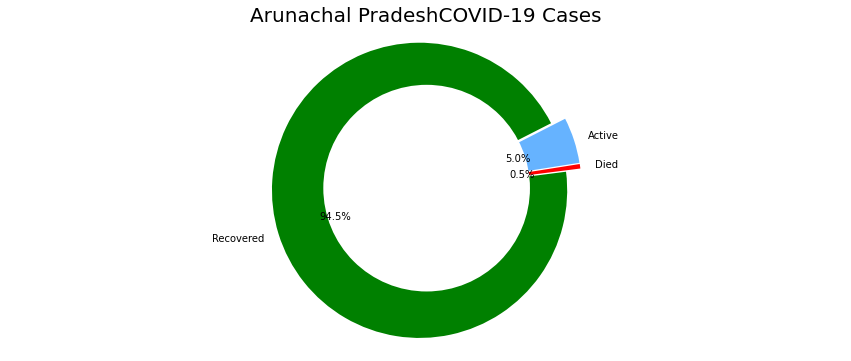

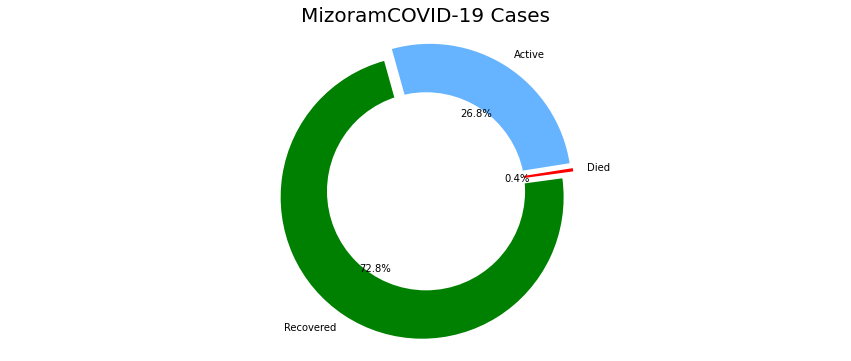

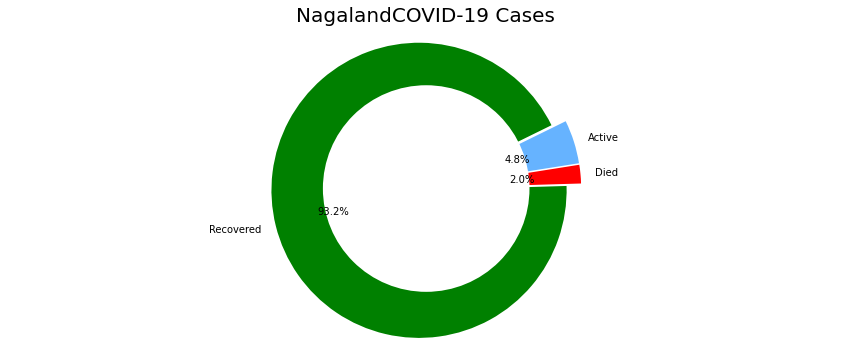

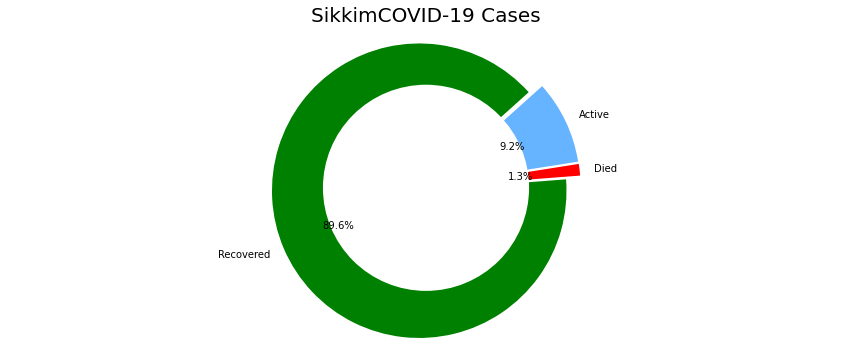

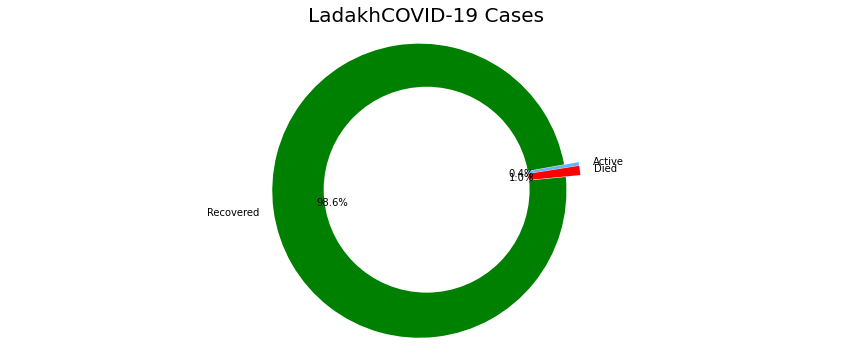

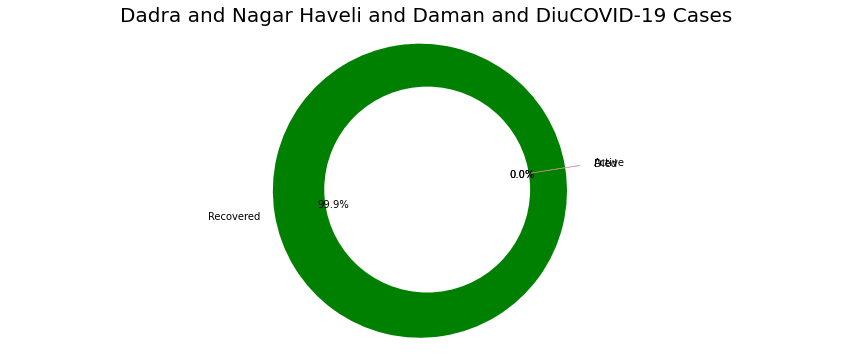

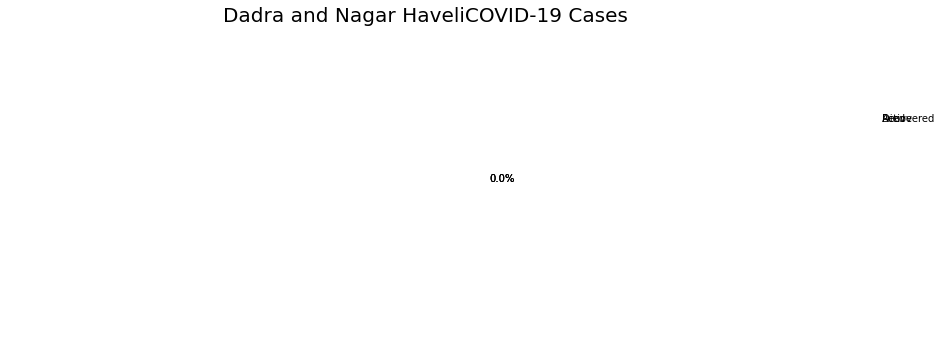

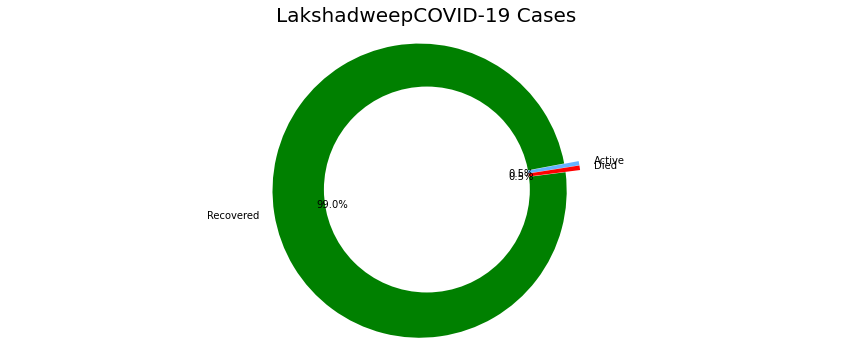

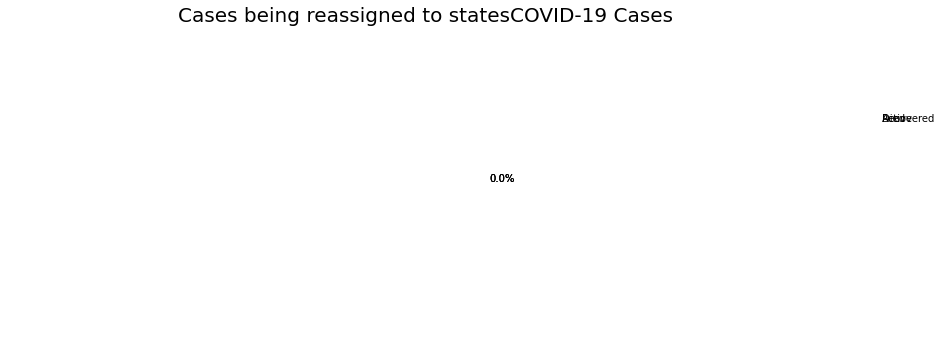

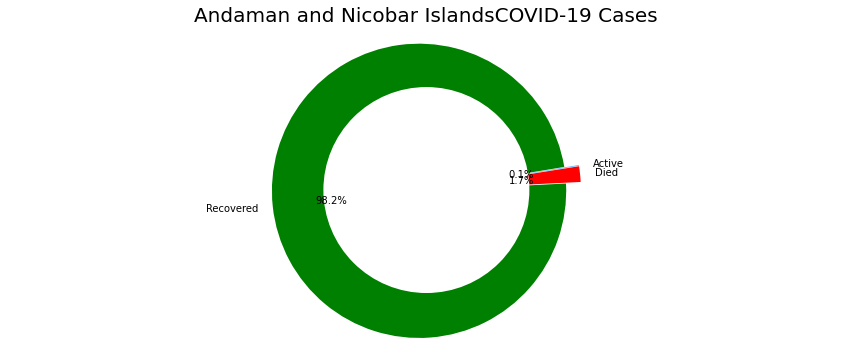

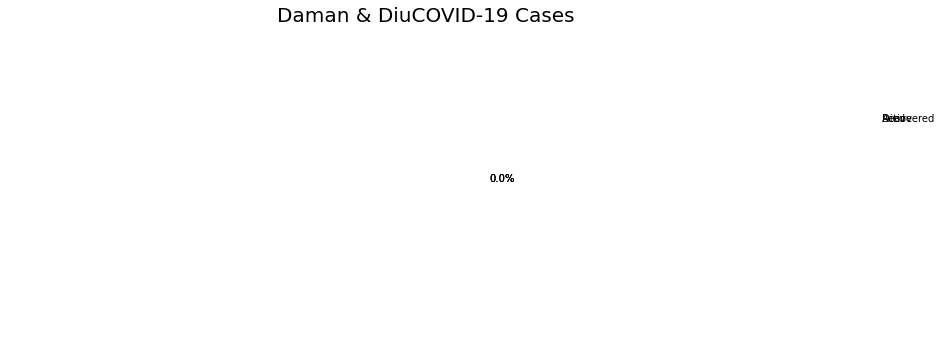

In [25]:
total_cases_india = 0
cured_cases_india = 0
death_cases_india = 0
active_cases_india = 0
state_df = pd.DataFrame()

for state in States:
    one_state_df = df_final_India.loc[df_final_India['State/UnionTerritory'] == state,:]
    state_df = pd.concat([state_df,pd.DataFrame(one_state_df.iloc[-1,:]).T],axis = 0)
    total_cases = one_state_df['Confirmed'].values[-1]
    cured = one_state_df['Cured'].values[-1]
    deaths = one_state_df['Deaths'].values[-1]
    active = total_cases - cured - deaths
    plot_pie(active, cured, deaths,state)
    total_cases_india += total_cases
    cured_cases_india += cured
    death_cases_india += deaths
    active_cases_india += active

In [26]:
state_df.reset_index(inplace = True,drop = True)
state_df

State/UnionTerritory       Date      Sno      Cured  \
0                                Maharashtra 2021-08-11  18095.0  6159676.0   
1                             Maharashtra*** 2021-08-11      0.0        0.0   
2                                     Kerala 2021-08-11  18091.0  3396184.0   
3                                  Karnataka 2021-08-11  18090.0  2861499.0   
4                                 Karanataka 2021-08-11      0.0        0.0   
5                                 Tamil Nadu 2021-08-11  18105.0  2524400.0   
6                             Andhra Pradesh 2021-08-11  18076.0  1952736.0   
7                              Uttar Pradesh 2021-08-11  18109.0  1685492.0   
8                                West Bengal 2021-08-11  18110.0  1506532.0   
9                                      Delhi 2021-08-11  18083.0  1411280.0   
10                              Chhattisgarh 2021-08-11  18081.0   988189.0   
11                                    Odisha 2021-08-11  18100.0   972710.0   
12                                 Rajasthan 2021-08-11  18103.0   944700.0   
13                                   Gujarat 2021-08-11  18085.0   814802.0   
14                            Madhya Pradesh 2021-08-11  18094.0   781330.0   
15                         Madhya Pradesh*** 2021-08-11      0.0        0.0   
16                                   Haryana 2021-08-11  18086.0   759790.0   
17                                     Bihar 2021-08-11  18079.0   715352.0   
18                                 Bihar**** 2021-08-11      0.0        0.0   
19                                 Telangana 2021-08-11  18106.0   638410.0   
20                                    Punjab 2021-08-11  18102.0   582791.0   
21                                     Assam 2021-08-11  18078.0   559684.0   
22                                 Telengana 2021-08-11      0.0        0.0   
23                                 Jharkhand 2021-08-11  18089.0   342102.0   
24                               Uttarakhand 2021-08-11  18108.0   334650.0   
25                         Jammu and Kashmir 2021-08-11  18088.0   317081.0   
26                          Himachal Pradesh 2021-08-11  18087.0   202761.0   
27                         Himanchal Pradesh 2021-08-11      0.0        0.0   
28                                       Goa 2021-08-11  18084.0   167978.0   
29                                Puducherry 2021-08-11  18101.0   119115.0   
30                                   Manipur 2021-08-11  18096.0    96776.0   
31                                   Tripura 2021-08-11  18107.0    77811.0   
32                                 Meghalaya 2021-08-11  18097.0    64157.0   
33                                Chandigarh 2021-08-11  18080.0    61150.0   
34                         Arunachal Pradesh 2021-08-11  18077.0    47821.0   
35                                   Mizoram 2021-08-11  18098.0    33722.0   
36                                  Nagaland 2021-08-11  18099.0    26852.0   
37                                    Sikkim 2021-08-11  18104.0    25095.0   
38                                    Ladakh 2021-08-11  18092.0    20130.0   
39  Dadra and Nagar Haveli and Daman and Diu 2021-08-11  18082.0    10646.0   
40                    Dadra and Nagar Haveli 2021-08-11      0.0        0.0   
41                               Lakshadweep 2021-08-11  18093.0    10165.0   
42          Cases being reassigned to states 2021-08-11      0.0        0.0   
43               Andaman and Nicobar Islands 2021-08-11  18075.0     7412.0   
44                               Daman & Diu 2021-08-11      0.0        0.0   

      Deaths  Confirmed New Cases  
0   134201.0  6363442.0    5609.0  
1        0.0        0.0       0.0  
2    18004.0  3586693.0   21119.0  
3    36848.0  2921049.0    1338.0  
4        0.0        0.0       0.0  
5    34367.0  2579130.0    1893.0  
6    13564.0  1985182.0    1461.0  
7    22775.0  1708812.0      19.0  
8    18252.0  1534999.0     639.0  
9    25068.0  1436852.0      

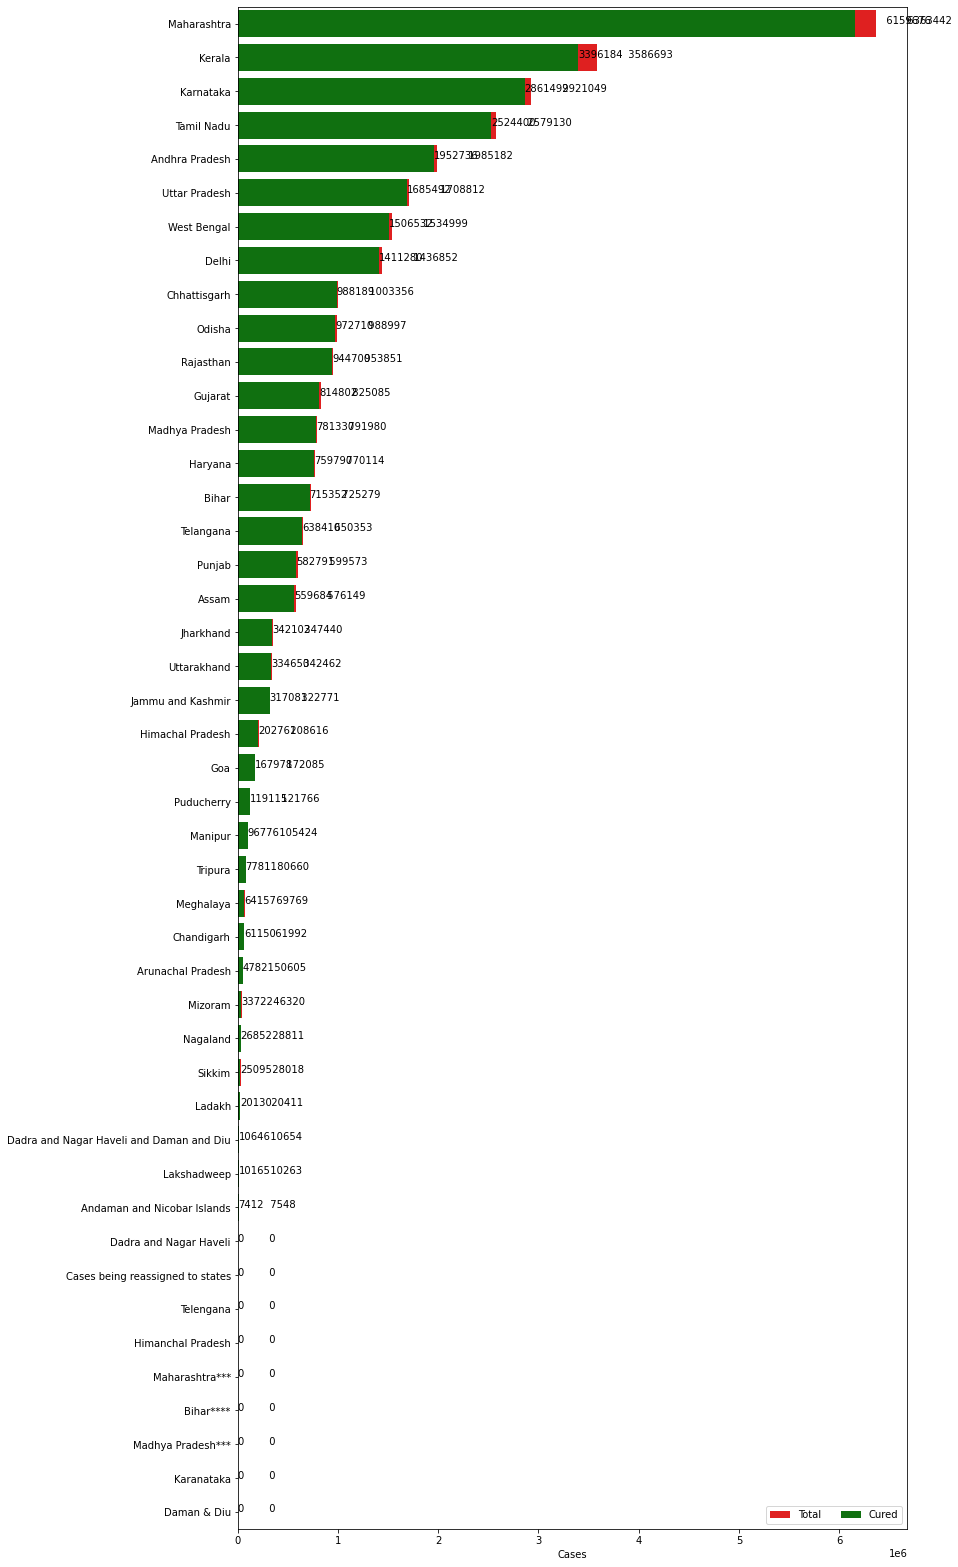

In [27]:
f, ax = plt.subplots(figsize=(12, 28))
data = state_df[['State/UnionTerritory','Confirmed','Cured','Deaths']]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="State/UnionTerritory", data=data,label="Total", color="red")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="State/UnionTerritory", data=data, label="Cured", color="green")
ax.legend(ncol=5, loc="lower right", frameon=True)
ax.set(ylabel="",xlabel="Cases")
i = 0
for p in ax.patches:
    x = p.get_x() + p.get_width() + 3
    y = p.get_y() + p.get_height()/2
    if i <= len(States):
        ax.annotate(" "*10 + str(int(p.get_width())), (x, y))
    else:
        ax.annotate(int(p.get_width()), (x, y))
        
    i += 1

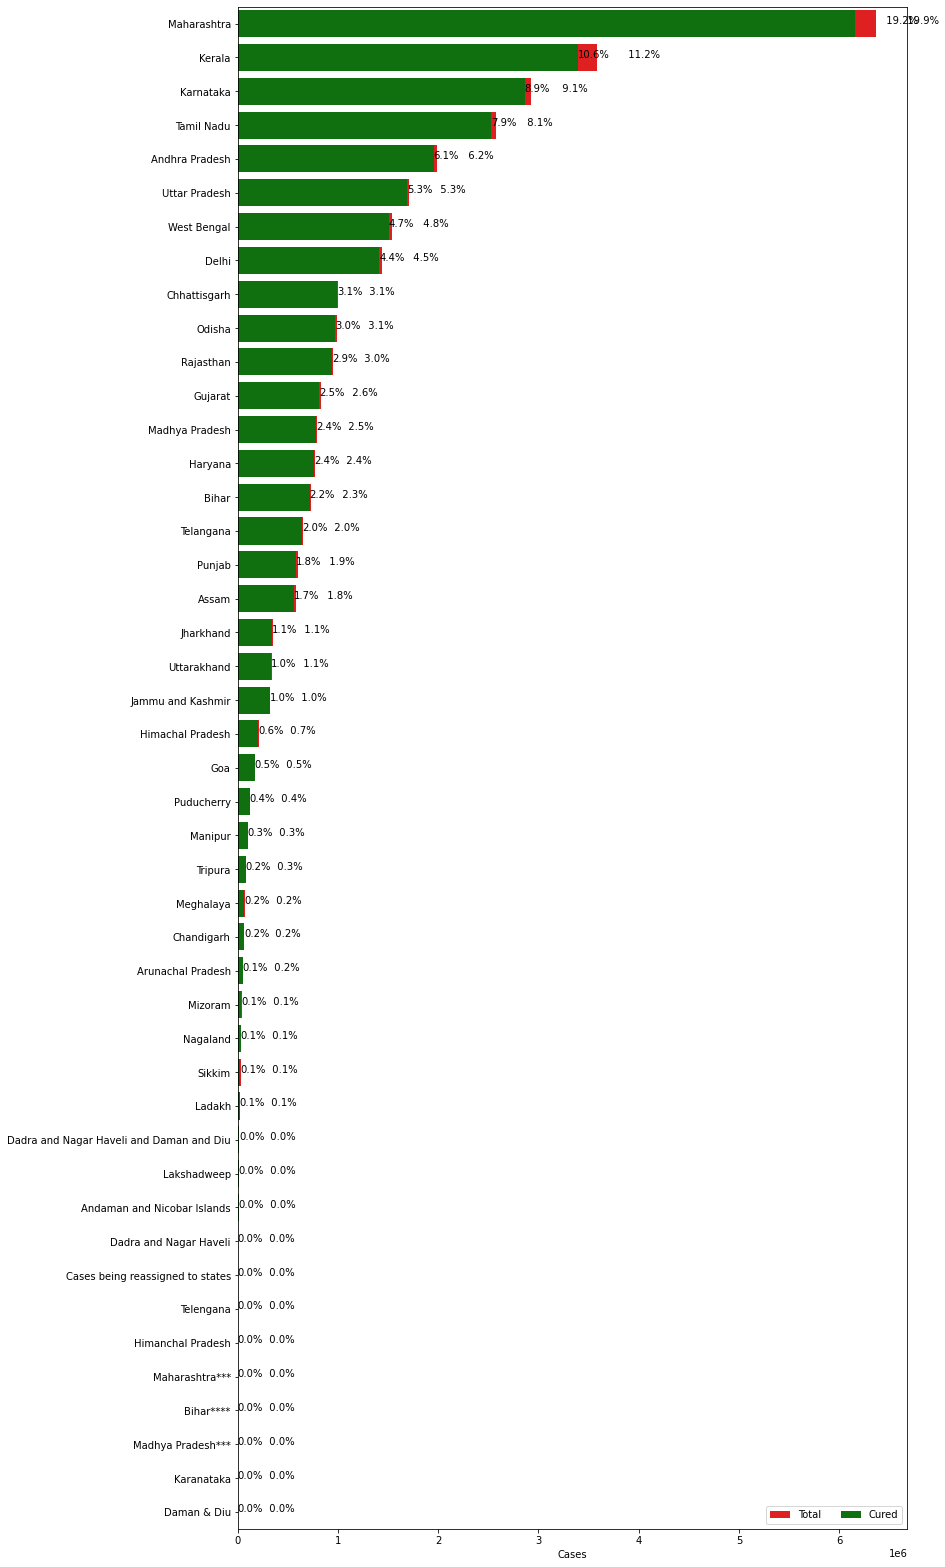

In [28]:
f, ax = plt.subplots(figsize=(12, 28))
data = state_df[['State/UnionTerritory','Confirmed','Cured','Deaths']]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="State/UnionTerritory", data=data,label="Total", color="red")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="State/UnionTerritory", data=data, label="Cured", color="green")
ax.legend(ncol=5, loc="lower right", frameon=True)
ax.set(ylabel="",xlabel="Cases")
total = total_cases_india
i = 0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 3
    y = p.get_y() + p.get_height()/2
    if i <= len(States):
        ax.annotate(" "*10 + str(percentage), (x, y))
    else:
        ax.annotate(percentage, (x, y))
        
    i += 1

# Overall Covid-19 Status in India

Total infected cases in India:  32036511.0
Total cured cases in India:  31220981.0
Total active cases in India:  386351.0
Total death cases in India:  429179.0


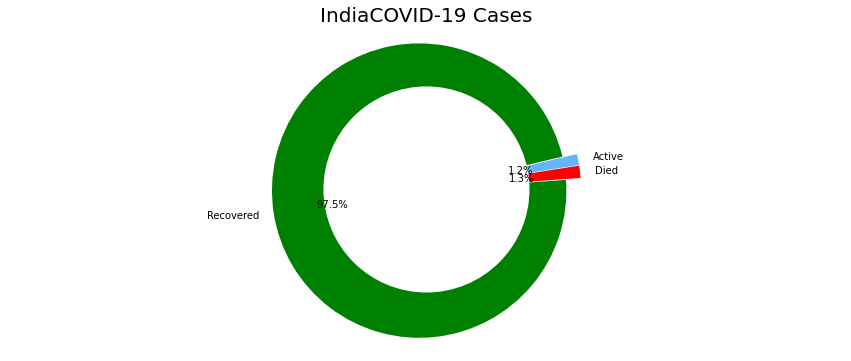

In [29]:
print("Total infected cases in India: ", total_cases_india)
print("Total cured cases in India: ", cured_cases_india)
print("Total active cases in India: ", active_cases_india)
print("Total death cases in India: ", death_cases_india)
plot_pie(active_cases_india, cured_cases_india, death_cases_india, "India")

# VISUALISING THE SPREADS GEOGRAPHICALLY

In [30]:
India_coord.rename(columns = {"Name of State / UT" : "State/UnionTerritory"},inplace = True)

In [31]:
set(India_coord['State/UnionTerritory'].values).symmetric_difference(set(state_df['State/UnionTerritory'].values))

{'Andaman And Nicobar ',
 'Andaman and Nicobar Islands',
 'Arunachal Pradesh',
 'Arunachal Pradesh ',
 'Assam',
 'Assam ',
 'Bihar',
 'Bihar ',
 'Bihar****',
 'Cases being reassigned to states',
 'Chandigarh',
 'Chandigarh ',
 'Chhattisgarh',
 'Chhattisgarh ',
 'Dadra And Nagar Haveli ',
 'Dadra and Nagar Haveli',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Daman & Diu',
 'Goa',
 'Goa ',
 'Gujarat',
 'Himachal Pradesh',
 'Himachal Pradesh ',
 'Himanchal Pradesh',
 'Jammu and Kashmir',
 'Jharkhand',
 'Jharkhand ',
 'Karanataka',
 'Ladakh',
 'Lakshadweep',
 'Lakshadweep ',
 'Madhya Pradesh',
 'Madhya Pradesh ',
 'Madhya Pradesh***',
 'Maharashtra***',
 'Manipur',
 'Manipur ',
 'Meghalaya',
 'Meghalaya ',
 'Mizoram',
 'Mizoram ',
 'Nagaland',
 'Nagaland ',
 'Odisha',
 'Orissa ',
 'Puducherry',
 'Puducherry ',
 'Sikkim',
 'Sikkim ',
 'Telangana',
 'Tripura',
 'Tripura ',
 'Union Territory of Jammu and Kashmir',
 'Union Territory of Ladakh',
 'West Bengal',
 'West Bengal '}

In [32]:
India_coord['State/UnionTerritory'] = India_coord['State/UnionTerritory'].str.strip()
state_df['State/UnionTerritory'] = state_df['State/UnionTerritory'].str.strip()

In [33]:
set(India_coord['State/UnionTerritory'].values).symmetric_difference(set(state_df['State/UnionTerritory'].values))

{'Andaman And Nicobar',
 'Andaman and Nicobar Islands',
 'Bihar****',
 'Cases being reassigned to states',
 'Dadra And Nagar Haveli',
 'Dadra and Nagar Haveli',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Daman & Diu',
 'Gujarat',
 'Himanchal Pradesh',
 'Jammu and Kashmir',
 'Karanataka',
 'Ladakh',
 'Madhya Pradesh***',
 'Maharashtra***',
 'Odisha',
 'Orissa',
 'Telangana',
 'Union Territory of Jammu and Kashmir',
 'Union Territory of Ladakh'}

In [34]:
India_coord.loc[India_coord.shape[0]] = ['Gujarat','22.2587','71.1924']
India_coord

State/UnionTerritory   Latitude  Longitude
0                    Andaman And Nicobar  11.667026  92.735983
1                         Andhra Pradesh  14.750429  78.570026
2                      Arunachal Pradesh  27.100399  93.616601
3                                  Assam  26.749981  94.216667
4                                  Bihar  25.785414  87.479973
5                             Chandigarh  30.719997  76.780006
6                           Chhattisgarh   22.09042  82.159987
7                 Dadra And Nagar Haveli  20.266578  73.016618
8                                  Delhi  28.669993  77.230004
9                                    Goa  15.491997  73.818001
10                               Haryana  28.450006  77.019991
11                      Himachal Pradesh  31.100025  77.166597
12  Union Territory of Jammu and Kashmir      33.45      76.24
13                             Jharkhand  23.800393  86.419986
14                             Karnataka  12.570381  76.919997
15                                Kerala   8.900373  76.569993
16                           Lakshadweep  10.562573  72.636867
17                        Madhya Pradesh  21.300391  76.130019
18                           Maharashtra  19.250232  73.160175
19                               Manipur  24.799971  93.950017
20                             Meghalaya  25.570492  91.880014
21                               Mizoram  23.710399  92.720015
22                              Nagaland  25.666998   94.11657
23                                Orissa   19.82043  85.900017
24                            Puducherry  11.934994      79.83
25                                Punjab  31.519974  75.980003
26                             Rajasthan  26.449999  74.639981
27                                Sikkim   27.33333  88.616647
28                             Telengana    18.1124    79.0193
29                            Tamil Nadu  12.920386  79.150042
30                               Tripura  23.835404  91.279999
31                         Uttar Pradesh  27.599981  78.050006
32                           Uttarakhand  30.320409  78.050006
33                           West Bengal   22.58039  88.329947
34             Union Territory of Ladakh       34.1      77.34
35                               Gujarat    22.2587    71.1924

In [35]:
set(India_coord['State/UnionTerritory'].values).symmetric_difference(set(state_df['State/UnionTerritory'].values))

{'Andaman And Nicobar',
 'Andaman and Nicobar Islands',
 'Bihar****',
 'Cases being reassigned to states',
 'Dadra And Nagar Haveli',
 'Dadra and Nagar Haveli',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Daman & Diu',
 'Himanchal Pradesh',
 'Jammu and Kashmir',
 'Karanataka',
 'Ladakh',
 'Madhya Pradesh***',
 'Maharashtra***',
 'Odisha',
 'Orissa',
 'Telangana',
 'Union Territory of Jammu and Kashmir',
 'Union Territory of Ladakh'}

In [36]:
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Andaman And Nicobar", 
                                        "Andaman and Nicobar Islands",India_coord['State/UnionTerritory'])
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Union Territory of Jammu and Kashmir", 
                                        "Jammu and Kashmir",India_coord['State/UnionTerritory'])
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Union Territory of Ladakh", 
                                        "Ladakh",India_coord['State/UnionTerritory'])
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Orissa", 
                                        "Odisha",India_coord['State/UnionTerritory'])
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Dadra And Nagar Haveli", 
                                        "Dadar Nagar Haveli",India_coord['State/UnionTerritory'])

In [37]:
set(India_coord['State/UnionTerritory'].values).symmetric_difference(set(state_df['State/UnionTerritory'].values))

{'Bihar****',
 'Cases being reassigned to states',
 'Dadar Nagar Haveli',
 'Dadra and Nagar Haveli',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Daman & Diu',
 'Himanchal Pradesh',
 'Karanataka',
 'Madhya Pradesh***',
 'Maharashtra***',
 'Telangana'}

In [38]:
df_full = pd.merge(India_coord,state_df,on='State/UnionTerritory').reset_index(drop = True)
df_full

State/UnionTerritory   Latitude  Longitude       Date      Sno  \
0   Andaman and Nicobar Islands  11.667026  92.735983 2021-08-11  18075.0   
1                Andhra Pradesh  14.750429  78.570026 2021-08-11  18076.0   
2             Arunachal Pradesh  27.100399  93.616601 2021-08-11  18077.0   
3                         Assam  26.749981  94.216667 2021-08-11  18078.0   
4                         Bihar  25.785414  87.479973 2021-08-11  18079.0   
5                    Chandigarh  30.719997  76.780006 2021-08-11  18080.0   
6                  Chhattisgarh   22.09042  82.159987 2021-08-11  18081.0   
7                         Delhi  28.669993  77.230004 2021-08-11  18083.0   
8                           Goa  15.491997  73.818001 2021-08-11  18084.0   
9                       Haryana  28.450006  77.019991 2021-08-11  18086.0   
10             Himachal Pradesh  31.100025  77.166597 2021-08-11  18087.0   
11            Jammu and Kashmir      33.45      76.24 2021-08-11  18088.0   
12                    Jharkhand  23.800393  86.419986 2021-08-11  18089.0   
13                    Karnataka  12.570381  76.919997 2021-08-11  18090.0   
14                       Kerala   8.900373  76.569993 2021-08-11  18091.0   
15                  Lakshadweep  10.562573  72.636867 2021-08-11  18093.0   
16               Madhya Pradesh  21.300391  76.130019 2021-08-11  18094.0   
17                  Maharashtra  19.250232  73.160175 2021-08-11  18095.0   
18                      Manipur  24.799971  93.950017 2021-08-11  18096.0   
19                    Meghalaya  25.570492  91.880014 2021-08-11  18097.0   
20                      Mizoram  23.710399  92.720015 2021-08-11  18098.0   
21                     Nagaland  25.666998   94.11657 2021-08-11  18099.0   
22                       Odisha   19.82043  85.900017 2021-08-11  18100.0   
23                   Puducherry  11.934994      79.83 2021-08-11  18101.0   
24                       Punjab  31.519974  75.980003 2021-08-11  18102.0   
25                    Rajasthan  26.449999  74.639981 2021-08-11  18103.0   
26                       Sikkim   27.33333  88.616647 2021-08-11  18104.0   
27                    Telengana    18.1124    79.0193 2021-08-11      0.0   
28                   Tamil Nadu  12.920386  79.150042 2021-08-11  18105.0   
29                      Tripura  23.835404  91.279999 2021-08-11  18107.0   
30                Uttar Pradesh  27.599981  78.050006 2021-08-11  18109.0   
31                  Uttarakhand  30.320409  78.050006 2021-08-11  18108.0   
32                  West Bengal   22.58039  88.329947 2021-08-11  18110.0   
33                       Ladakh       34.1      77.34 2021-08-11  18092.0   
34                      Gujarat    22.2587    71.1924 2021-08-11  18085.0   

        Cured    Deaths  Confirmed New Cases  
0      7412.0     129.0     7548.0       2.0  
1   1952736.0   13564.0  1985182.0    1461.0  
2     47821.0     248.0    50605.0     233.0  
3    559684.0    5420.0   576149.0     929.0  
4    715352.0    9646.0   725279.0      44.0  
5     61150.0     811.0    61992.0       8.0  
6    988189.0   13544.0  1003356.0     112.0  
7   1411280.0   25068.0  1436852.0      52.0  
8    167978.0    3164.0   172085.0     141.0  
9    759790.0    9652.0   770114.0      23.0  
10   202761.0    3537.0   208616.0     419.0  
11   317081.0    4392.0   322771.0     113.0  
12   342102.0    5130.0   347440.0      34.0  
13  2861499.0   36848.0  2921049.0    1338.0  
14  3396184.0   18004.0  3586693.0   21119.0  
15    10165.0      51.0    10263.0      14.0  
16   781330.0   10514.0   791980.0      10.0  
17  6159676.0  134201.0  6363442.0    5609.0  
18    96776.0    1664.0   105424.0     633.0  
19    64157.0    1185.0    69769.0     411.0  
20    33722.0     171.0    46320.0     863.0  
21    26852.0     585.0    28811.0     102.0  
22   972710.0    6565.0   988997.0    1041.0  
23   119115.0    1800.0   121766.0     101.0  
24   582791.0   16322.0   599573.0      59.0  
25   944700.0   

In [39]:
map = folium.Map(location=[20, 70], zoom_start=100,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Confirmed'], df_full['State/UnionTerritory']):
    folium.CircleMarker([lat, lon], radius=value*0.0015, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

In [40]:
map = folium.Map(location=[20, 70], zoom_start=4,tiles='OpenStreetMap')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Confirmed'], df_full['State/UnionTerritory']):
    folium.CircleMarker([lat, lon], radius=value*0.0015, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

# Lets check the trend of the virus

In [41]:
df_daywise_India = df_final_India.groupby("Date")['Confirmed','Cured','Deaths',"New Cases"].sum().reset_index()
df_daywise_India

Date   Confirmed       Cured    Deaths  New Cases
0   2020-01-31         1.0         0.0       0.0        0.0
1   2020-02-01         2.0         0.0       0.0        1.0
2   2020-02-02         3.0         0.0       0.0        1.0
3   2020-02-03         3.0         0.0       0.0        0.0
4   2020-02-04         3.0         0.0       0.0        0.0
..         ...         ...         ...       ...        ...
554 2021-08-07  31895385.0  31055861.0  427371.0    38628.0
555 2021-08-08  31934455.0  31099771.0  427862.0    39070.0
556 2021-08-09  31969954.0  31139457.0  428309.0    35499.0
557 2021-08-10  31998158.0  31180968.0  428682.0    28204.0
558 2021-08-11  32036511.0  31220981.0  429179.0    38353.0

[559 rows x 5 columns]

In [42]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_daywise_India['Date'], y = df_daywise_India['Confirmed'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [43]:
fig = px.bar(df_daywise_India, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [44]:
fig = px.bar(df_daywise_India, x="Date", y="Confirmed", color='Confirmed', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)

'''Colour Scale for plotly
https://plot.ly/python/builtin-colorscales/
'''

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [45]:
fig = px.line(x=df_daywise_India['Date'], y=df_daywise_India['New Cases'], labels = {'x': "Dates",'y': "Counts"})
fig.update_layout( showlegend=False,title_text="Trend of Coronavirus cases")
fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

# Forecasting Using fbprophet

In [46]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
df = df_daywise_India.iloc[:-1,]
df_train = df.loc[df['Date']<= "2020-05-23",:]
df_test = df.loc[df['Date'] > "2020-05-23",:]

In [ ]:
confirmed_train = df_train[['Date','Confirmed']]
confirmed_test = df_test[['Date','Confirmed']]

deaths_train = df_train[['Date','Deaths']]
deaths_test = df_test[['Date','Deaths']]

recovered_train = df_train[['Date','Cured']]
recovered_test = df_test[['Date','Cured']]

In [ ]:
confirmed_train.columns = ['ds','y']
confirmed_train.tail()

In [ ]:
m = Prophet()
m.fit(confirmed_train)
future = m.make_future_dataframe(periods=5,freq = "D")
future.tail(5)

In [ ]:
forecast = m.predict(future)
forecast

In [ ]:
result_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)
result_df['Actual'] = confirmed_test['Confirmed']
result_df

In [ ]:
trace0 = go.Scatter(
        x = result_df['ds'],
        y = result_df['Actual'],
        mode = 'lines+markers',
        name='Actuals',
        line = dict(color = '#dd0000', shape = 'linear'),
        opacity = 0.3,
        connectgaps=True
)
trace1 = go.Scatter(
        x = result_df['ds'],
        y = result_df['yhat'],
        name='Predicted',
        mode = 'lines+markers',
        marker = dict(
            size = 10,
            color = '#44dd00'),
        opacity = 0.3    
)
data = [trace0, trace1]
layout = go.Layout(
    yaxis=dict(
        title="Results for Prophet (Total Cases)"
    )
)
fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
recovered_train.columns = ['ds','y']
recovered_train.tail()